In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from  sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LassoCV

In [4]:
cars = pd.read_csv("final_cars.csv")

In [5]:
cars.shape

(201, 8)

In [6]:
cars = pd.get_dummies(cars)
y = cars['price']
X= cars.drop(columns=['price'])

In [7]:
cars

,engine-size,horsepower,price,avg-mpg,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,13495.0,34.5,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,16500.0,34.5,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,16500.0,32.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,13950.0,39.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,17450.0,29.0,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,141,114.0,16845.0,37.0,0,1,1,0,0,0,0,1,0,0,0,1
197,141,160.0,19045.0,31.5,0,1,1,0,0,0,0,1,0,0,0,1
198,173,134.0,21485.0,29.5,0,1,1,0,0,0,0,1,0,0,0,1
199,145,106.0,22470.0,39.5,1,0,1,0,0,0,0,1,0,0,0,1


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [9]:
model = LinearRegression(normalize=True)

In [10]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [11]:
for t in zip(X_train.columns,model.coef_):
    print(f"{t[0]:20s}--  {t[1]}")

engine-size         --  100.4960765977554
horsepower          --  54.55120036197133
avg-mpg             --  -56.63431928793346
fuel-type_diesel    --  1028.3239920015385
fuel-type_gas       --  -1028.3239920015394
num-of-doors_four   --  -69.74519306875895
num-of-doors_two    --  69.74519306875898
body-style_convertible--  1315.3817219679063
body-style_hardtop  --  1457.7445498434158
body-style_hatchback--  -919.3465095897586
body-style_sedan    --  765.2001442922676
body-style_wagon    --  -523.2560452222709
drive-wheels_4wd    --  -596.1734974897528
drive-wheels_fwd    --  -1102.6328852600348
drive-wheels_rwd    --  1211.798754505879


In [12]:
y_pred = model.predict(X_train)

In [13]:
print("Traning",np.sqrt(mean_squared_error(y_train,y_pred)))
r2score = r2_score(y_train,y_pred)
print(f"Tranning R2 Score = {r2score:0.2f}")

Traning 3148.888971529906
Tranning R2 Score = 0.83


In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Testing",np.sqrt(mean_squared_error(y_test,y_pred)))
r2score = r2_score(y_test,y_pred)
print(f"Testing R2 Score = {r2score:0.2f}")

Testing 3747.1458044339965
Testing R2 Score = 0.83


<AxesSubplot:ylabel='price'>

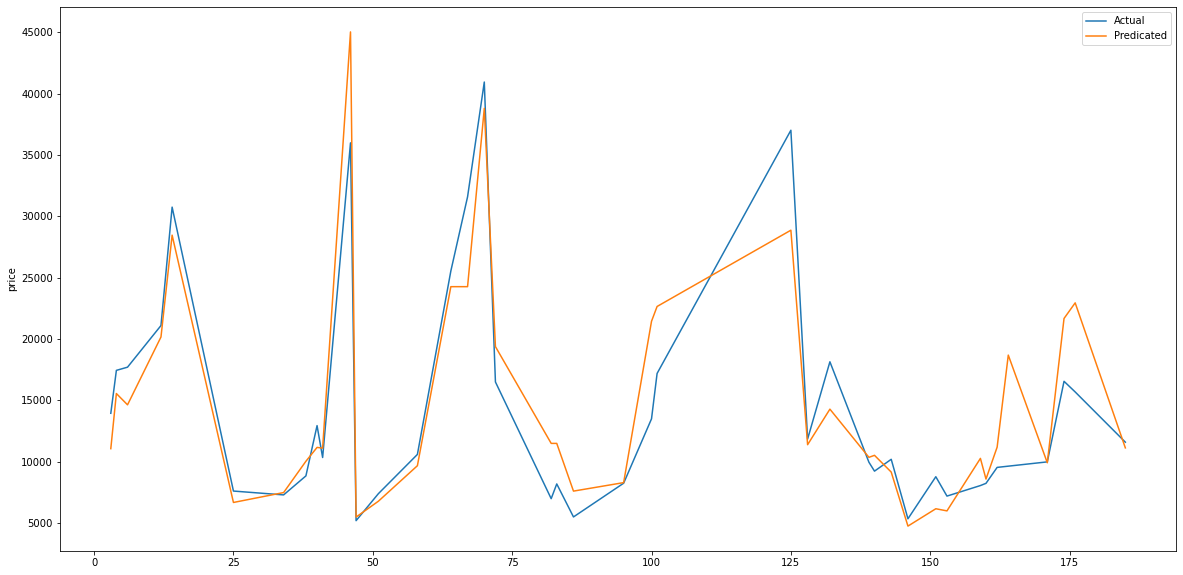

In [16]:
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test,x = X_test.index,label="Actual")
sns.lineplot( y = y_pred,x = X_test.index,label="Predicated")

In [17]:
for p,a in zip(y_pred,y_test):
    print(f"{p:.2f} -  {a:.2f}")

11168.32 -  12945.00
6779.09 -  7395.00
10522.26 -  9233.00
14287.04 -  18150.00
9915.59 -  9988.00
11495.20 -  6989.00
5992.07 -  7198.00
45046.60 -  36000.00
38814.87 -  40960.00
21453.77 -  13499.00
6166.72 -  8778.00
11495.20 -  8189.00
6678.59 -  7609.00
10358.93 -  9960.00
8587.58 -  8238.00
21680.83 -  16558.00
8296.97 -  8249.00
11065.74 -  13950.00
11111.67 -  10345.00
9675.30 -  10595.00
28473.48 -  30760.00
28877.91 -  37028.00
20170.46 -  21105.00
14640.30 -  17710.00
9155.42 -  10198.00
11190.22 -  9538.00
22953.13 -  15690.00
18694.27 -  9639.00
22659.56 -  17199.00
7604.42 -  5499.00
24273.96 -  25552.00
5488.89 -  5195.00
10272.12 -  8058.00
7485.90 -  7295.00
10038.56 -  8845.00
11129.11 -  11595.00
15561.10 -  17450.00
19385.80 -  16503.00
24273.96 -  31600.00
4752.37 -  5348.00
11389.58 -  11850.00


In [18]:
modelRandom = RandomForestRegressor(max_depth=5)
modelRandom.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [19]:
print("Train_score ", model.score(X_train,y_train))
y_pred = modelRandom.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"Testing R2 Score = {r2score:0.2f}")
print("Testing",np.sqrt(mean_squared_error(y_test,y_pred)))

Train_score  0.8275597985657044
Testing R2 Score = 0.94
Testing 2238.513687213515


<AxesSubplot:ylabel='price'>

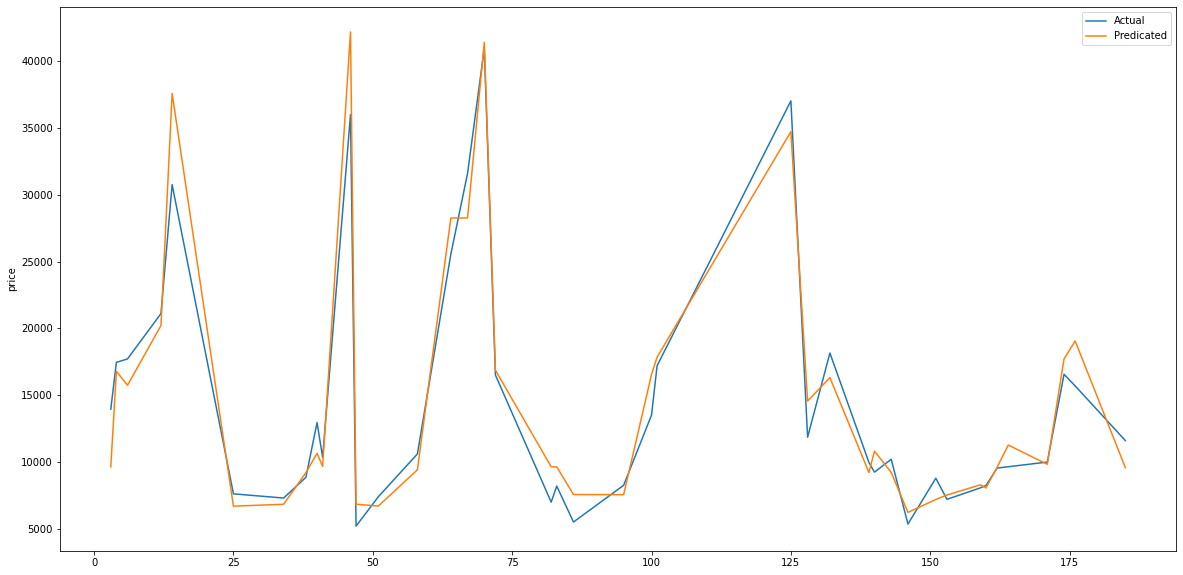

In [20]:
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test,x = X_test.index,label="Actual")
sns.lineplot( y = y_pred,x = X_test.index,label="Predicated")

In [21]:
for p,a in zip(y_pred,y_test):
    print(f"{p:.2f} -  {a:.2f}")

10638.72 -  12945.00
6696.46 -  7395.00
10805.91 -  9233.00
16308.99 -  18150.00
9819.64 -  9988.00
9631.60 -  6989.00
7521.25 -  7198.00
42190.24 -  36000.00
41414.14 -  40960.00
16546.75 -  13499.00
7186.00 -  8778.00
9631.60 -  8189.00
6686.00 -  7609.00
9209.13 -  9960.00
8047.46 -  8238.00
17705.87 -  16558.00
7548.58 -  8249.00
9632.20 -  13950.00
9664.00 -  10345.00
9407.38 -  10595.00
37585.34 -  30760.00
34723.77 -  37028.00
20211.86 -  21105.00
15737.72 -  17710.00
9212.68 -  10198.00
9604.14 -  9538.00
19052.82 -  15690.00
11263.09 -  9639.00
17840.09 -  17199.00
7556.24 -  5499.00
28263.54 -  25552.00
6829.78 -  5195.00
8284.50 -  8058.00
6830.60 -  7295.00
9194.09 -  8845.00
9568.81 -  11595.00
16787.19 -  17450.00
16865.71 -  16503.00
28263.54 -  31600.00
6219.34 -  5348.00
14556.75 -  11850.00


# Hyper parameter

In [22]:
hyper_parameter = {'max_depth': [2,4,6,8],
                  'min_samples_leaf': [5,10,15]}

In [23]:
grid_search = GridSearchCV(DecisionTreeRegressor(),hyper_parameter)

In [24]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [5, 10, 15]})

In [25]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5}

# Gradient descent

In [26]:
y = cars['price']
X = cars.drop(columns=['price'])
X

,engine-size,horsepower,avg-mpg,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,34.5,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,34.5,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,32.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,39.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,29.0,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,141,114.0,37.0,0,1,1,0,0,0,0,1,0,0,0,1
197,141,160.0,31.5,0,1,1,0,0,0,0,1,0,0,0,1
198,173,134.0,29.5,0,1,1,0,0,0,0,1,0,0,0,1
199,145,106.0,39.5,1,0,1,0,0,0,0,1,0,0,0,1


In [27]:
X['engine-size'] = scale(X['engine-size'])
X['horsepower'] = scale(X['horsepower'])
X['avg-mpg'] = scale(X['avg-mpg'])

In [28]:
X

,engine-size,horsepower,avg-mpg,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,0.075389,0.206174,-0.618060,0,1,0,1,1,0,0,0,0,0,0,1
1,0.075389,0.206174,-0.618060,0,1,0,1,1,0,0,0,0,0,0,1
2,0.606234,1.359551,-0.874627,0,1,0,1,0,0,1,0,0,0,0,1
3,-0.431327,-0.035230,-0.156238,0,1,1,0,0,0,0,1,0,0,1,0
4,0.220165,0.313465,-1.182508,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.340812,0.286643,-0.361492,0,1,1,0,0,0,0,1,0,0,0,1
197,0.340812,1.520487,-0.925941,0,1,1,0,0,0,0,1,0,0,0,1
198,1.112950,0.823097,-1.131195,0,1,1,0,0,0,0,1,0,0,0,1
199,0.437329,0.072061,-0.104925,1,0,1,0,0,0,0,1,0,0,0,1


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [30]:
model = SGDRegressor(random_state=100)
model.fit(X_train,y_train)

SGDRegressor(random_state=100)

In [31]:
print('Train Score',model.score(X_train,y_train))

Train Score 0.8245775491912977


In [32]:
y_pred = model.predict(X_test)
r2_score = r2_score(y_test,y_pred)
print(f"R2 Score : {r2_score:0.2f}")

R2 Score : 0.81


# Regularization

In [34]:
lm = LassoCV(alphas=[0.10,0.5,1.0], cv=5,normalize=True)
lm.fit(X,y)

LassoCV(alphas=[0.1, 0.5, 1.0], cv=5, normalize=True)

In [35]:
for t in zip(X_train.columns, lm.coef_):
    print(f"{t[0]:25s} {t[1]}")

engine-size               3900.564482427424
horsepower                1964.5521249043559
avg-mpg                   -829.7467112530021
fuel-type_diesel          2983.4923191730804
fuel-type_gas             -1.3046165726728667e-11
num-of-doors_four         369.0706111141392
num-of-doors_two          -6.482911018111067e-14
body-style_convertible    2820.661041766841
body-style_hardtop        488.17940304909644
body-style_hatchback      -1219.2033939895716
body-style_sedan          0.0
body-style_wagon          -1119.6918683354957
drive-wheels_4wd          0.0
drive-wheels_fwd          -710.1973389765753
drive-wheels_rwd          1304.7250494253065


In [36]:
lm.coef_

array([ 3.90056448e+03,  1.96455212e+03, -8.29746711e+02,  2.98349232e+03,
       -1.30461657e-11,  3.69070611e+02, -6.48291102e-14,  2.82066104e+03,
        4.88179403e+02, -1.21920339e+03,  0.00000000e+00, -1.11969187e+03,
        0.00000000e+00, -7.10197339e+02,  1.30472505e+03])

In [44]:
y_pred = lm.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.86
